In [32]:
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input, Conv2D,Flatten,MaxPool2D
import keras
from keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [22]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [19]:
print(x_train.dtype)
print(x_test.dtype)

uint8
uint8


In [20]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [34]:
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)

In [35]:
model = keras.Sequential([
    Input(shape=(28,28,1)),
    Conv2D(28, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.2),
    Dense(10, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,211,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,214,498 (4.63 MB)

 Trainable params: 1,214,498 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])
history=model.fit(x=x_train, y= y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - Accuracy: 0.9490 - loss: 0.1679
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - Accuracy: 0.9825 - loss: 0.0563
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - Accuracy: 0.9895 - loss: 0.0329
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - Accuracy: 0.9934 - loss: 0.0206
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - Accuracy: 0.9949 - loss: 0.0165
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - Accuracy: 0.9964 - loss: 0.0116
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - Accuracy: 0.9965 - loss: 0.0111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - Accuracy: 0.9973 - loss: 0.0084
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - Accuracy: 0.9969 - loss: 0.0100
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - Accuracy: 0.9977 - loss: 0.0073


In [56]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.9805 - loss: 0.0948


[0.09479902684688568, 0.9804999828338623]

In [39]:
y_pred= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [43]:
import numpy as np
y_predict = np.argmax(y_pred, axis=1)
y_test_eval = np.argmax(y_test, axis=1)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

cm =confusion_matrix(y_test_eval,y_predict)

<function matplotlib.pyplot.show(close=None, block=None)>

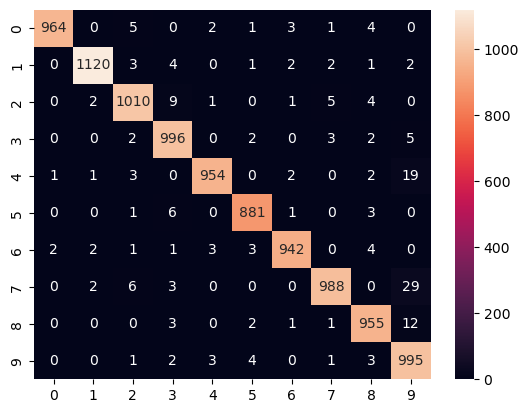

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d')
plt.show

In [48]:
print(classification_report(y_test_eval,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.96      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.94      0.99      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [57]:
y_pred_single=model.predict(x_test[[22]])
y_predict_single= np.argmax(y_pred_single, axis=1 )

y_test_eval= np.argmax(y_test, axis=1 )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


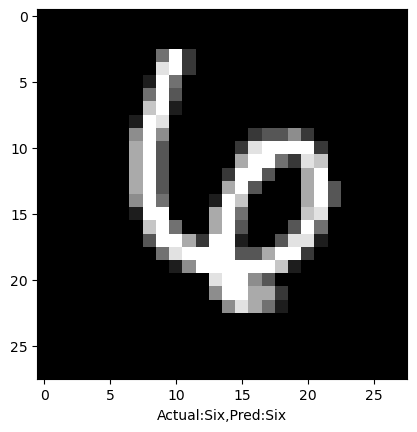

In [58]:
col_names = ['Zero','One' ,'Two' ,'Three' ,'Four','Five','Six','Seven' ,'Eight','Nine']

#Visualizing the digits
plt.imshow(x_test[22].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test[22])], col_names[y_predict_single[0]]))
plt.show()